# Data exploration
## Multivariate time series data - Example: bike rental data

In this notebook we will import a dataset on bike rental over time with additional weather information.
The aim here is to illustrate how such a dataset can be explored using different popular python libraries, such as numpy, pandas, seaborn, matplotlib.

### Import libraries

In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # statistical data visualization
#import os # accessing directory structure

## Import data
### Dataset on bike rental form UCI:
http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

--> Unzip and copy data to folder.

### Information from website: 

Attribute Information:  
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered 

### Carefull: found some conflicting labels
https://github.com/christophM/interpretable-ml-book/blob/master/R/get-bike-sharing-dataset.R

Here it is treated as if:
season (1:spring, 2:summer, 3:fall, 4:winter)
and weathersit, levels = 1:3, labels = c('GOOD', 'MISTY', 'RAIN/SNOW/STORM'))

In [2]:
# e.g. on Windows machine: 
ROOT = "C:\\OneDrive - Netherlands eScience Center\\Courses\\python_data_exploration_tutorial\\"
filename = ROOT + 'data\\hour.csv'



In [3]:
# Import csv file as pandas DataFrame
data_bike_rent = pd.read_csv(filename, delimiter=',') #, nrows = X) # if you want to only import the first X rows

### Inspect the data...

In [95]:
data_bike_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
data_bike_rent.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [134]:
data_bike_rent.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

(array([  23.,   55.,  696., 1481., 2641., 3084., 2940., 2384., 2900.,
        1175.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

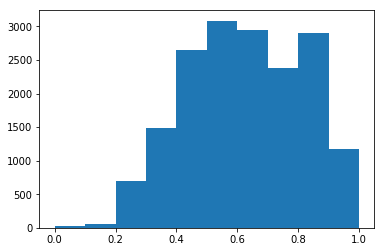

In [5]:
plt.hist(data_bike_rent.hum, 10)

In [96]:
data_bike_rent['hum'].describe()

count    17379.000000
mean         0.627229
std          0.192930
min          0.000000
25%          0.480000
50%          0.630000
75%          0.780000
max          1.000000
Name: hum, dtype: float64

### Detect correlations in data
Finding correlations is often one of the key steps when exploring multivariate datasets.  
One quick way to do this is by calculating (and displaying) a **correlation matrix**. 

### Calculating a correlation matrix

In [7]:
# Pandas
#df.corr()

# Numpy --> covariance matrix
#np.cov()

In [27]:
def plot_corr_matrix(df, fig_width):
    """ Plot correlation matrix.
    Args:
    -------
    df: pandas DataFrame
        Data to derive correlation matrix from.
    fig_width: float
        Width of figure.
    """
    
    # Remove NaN's
    df = df.dropna('columns')
    
    # Calculate correlation matrix
    corr = df.corr()
    
    # Plot
    plt.style.use('ggplot') #'default'
    fig = plt.figure(num=None, figsize=(fig_width, fig_width), facecolor='w', edgecolor='k')
    fig = plt.matshow(corr, fignum = 1, cmap = 'viridis')
    
    """ plt.matshow is a special version of imshow to plot matrix values. 
    If you like to have more control of how the figure loooks like, 
    try alternative ways, such as "pcolor" or "imshow"
    
    ax = fig.add_subplot(111)
    fig = plt.pcolor(corr, edgecolors='k', linewidths=2)
    ax.set_aspect(1)
    """
    
    # Set axis labels
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(fig)
    plt.title('Correlation Matrix', fontsize=15)
    plt.show()

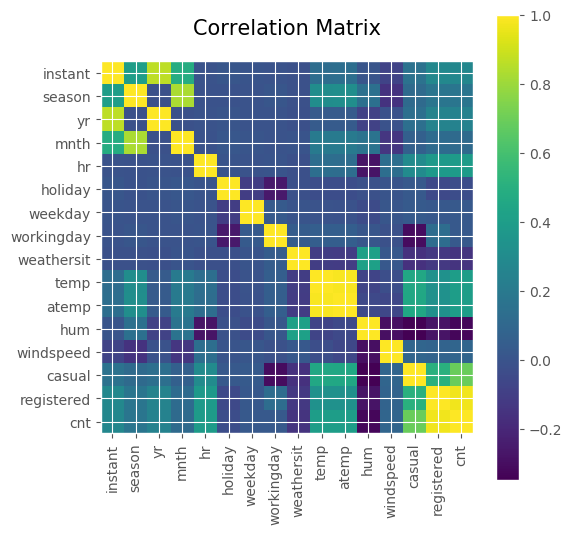

In [29]:
plot_corr_matrix(data_bike_rent, 6)

### Alternative: use build in function from seaborn
Seaborn is a library with many easy-to-use plotting functions. And those tend to be fancier-looking (objectively judged by me) than the default matplotlib ones. But in the end it is only a Matplotlib wrapper, so Matplotlib is more customizable.

In [60]:
#import seaborn as sns

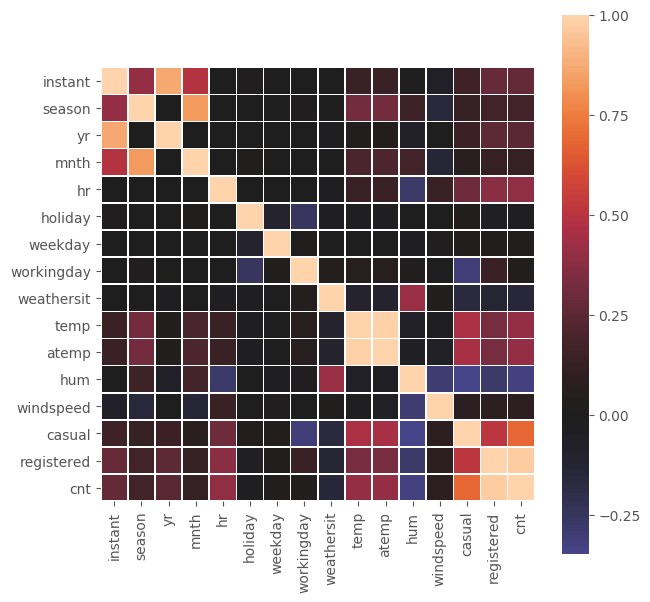

In [42]:
corr = data_bike_rent.corr()

plt.figure(num=None, figsize=(7,7))
sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            #cmap=sns.diverging_palette(220, 10, as_cmap=True), # define colormap
            center=0, # correlations matrix values are between -1 and 1, so we want to center the cmap to 0
            # annot=True, fmt='.1f', # plot matrix values on top
            linewidths=.5, 
            square=True)

## Having the correlation matrix we can start to dig deeper...

Text(0,0.5,'cnt')

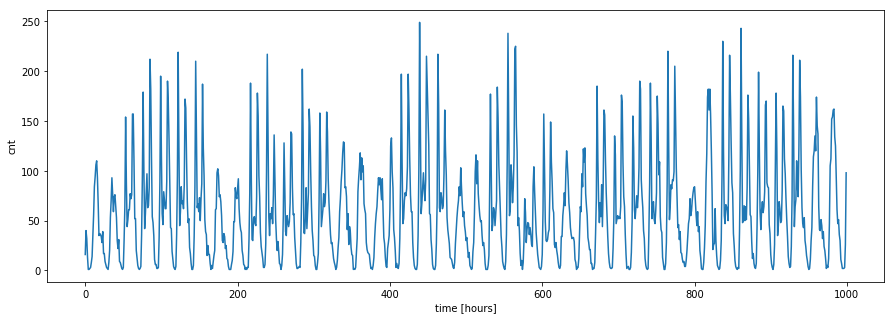

In [16]:
plt.figure(num=None, figsize=(15,5))
plt.plot(data_bike_rent['cnt'][:1000])
plt.xlabel('time [hours]')
plt.ylabel('cnt')

### Slicing, querying...

In [235]:
#data1 = data_bike_rent[(data_bike_rent['hr'] == 0) & (data_bike_rent['weekday'] == 1)]['cnt']
data1 = data_bike_rent.loc[(data_bike_rent['hr'] == 0) & (data_bike_rent['weekday'] == 1), 'cnt']

In [238]:
#data_day1 = data_bike_rent[data_bike_rent['weekday'] == 1][['hr', 'cnt']]
data_day1 = data_bike_rent.loc[data_bike_rent['weekday'] == 1, ['hr', 'cnt']]

In [242]:
data_day1[:10]

,hr,cnt
47,0,5
48,1,2
49,4,1
50,5,3
51,6,30
52,7,64
53,8,154
54,9,88
55,10,44
56,11,51


### Select particluar data for all weekdays == 1

In [240]:
#data_cnt = data_bike_rent[data_bike_rent['weekday'] == 1]['cnt'].values
#data_hr = data_bike_rent[data_bike_rent['weekday'] == 1]['hr'].values
data_cnt = data_bike_rent.loc[data_bike_rent['weekday'] == 1, 'cnt'].values
data_hr = data_bike_rent.loc[data_bike_rent['weekday'] == 1, 'hr'].values
data_cnt.shape, data_hr.shape

((2479,), (2479,))

In [241]:
data_cnt

array([ 5,  2,  1, ..., 90, 61, 49], dtype=int64)

### Find subset where also hour == 0
+ This could as well be done using pandas. To illustrate more of numpy we now do it using numpy though...

In [49]:
np.where(data_hr == 0)[0] # np.where gives all indices where condition is True

array([   0,   22,   46,   70,   93,  117,  141,  165,  189,  211,  234,
        257,  280,  303,  327,  350,  374,  398,  422,  446,  470,  494,
        518,  542,  566,  590,  614,  638,  662,  686,  710,  734,  758,
        782,  806,  830,  854,  877,  901,  925,  949,  973,  997, 1021,
       1045, 1069, 1093, 1117, 1140, 1164, 1188, 1212, 1235, 1258, 1282,
       1306, 1330, 1354, 1377, 1401, 1424, 1448, 1472, 1496, 1520, 1544,
       1567, 1591, 1615, 1639, 1663, 1687, 1711, 1735, 1759, 1783, 1807,
       1831, 1855, 1879, 1903, 1927, 1951, 1975, 1999, 2023, 2047, 2071,
       2095, 2119, 2143, 2167, 2191, 2215, 2239, 2263, 2264, 2288, 2312,
       2336, 2360, 2384, 2408, 2432, 2455], dtype=int64)

In [50]:
data_cnt[np.where(data_hr == 0)[0]]

array([  5,   5,  17,   7,   7,  15,  11,  37,  30,   4,  11,  13,  12,
         6,  23,  39,  12, 177,  53,  38,  41, 103,  29,  28,  26,  32,
       140,  35,  51,  34,  29,  30,  25,  40,  34,  97,  16,  37,  29,
        16,  53,  37,  32,  23,  15,  30,  17,  16,  24,  20,  17,  11,
        39,  15,  25,  19,  10,  21,   9,  41,  29,  17,  24,  23,  33,
        17,  37,  41,   6,  48,  34,  35,  40,  65,  49,  41,  40,  68,
        43,  39,  43,  47,  58,  33,  47,  26,  32, 104,  41,  45,  64,
        45,  51,  48,  31,  22,  23,  49,  27,  23,  21,  20,  28,  12,
        34], dtype=int64)

### Sort entire data accoring to day and hour

In [243]:
# Create new numpy array to collect the data
data_timed = np.zeros((24,7)) # 24 (hours) x 7 (days) numpy array

for day in range(7):
    idx_day = data_bike_rent['weekday'] == day
    data = data_bike_rent.loc[idx_day, 'cnt'].values
    data_hr = data_bike_rent.loc[idx_day, 'hr'].values
    for hour in range(24):
        cnts = data[np.where(data_hr == hour)[0]]
        data_timed[hour, day] = np.sum(cnts)/cnts.shape[0]

In [245]:
np.round(data_timed[:,0], 2)

array([ 93.99,  77.43,  61.63,  31.14,   9.36,   8.69,  14.5 ,  33.1 ,
        83.86, 156.54, 258.58, 315.38, 372.96, 374.93, 363.63, 353.93,
       355.4 , 318.77, 272.63, 225.48, 168.03, 127.65,  94.12,  61.9 ])

In [ ]:
fig = plt.figure(num=None, figsize=figsize)
for day in range(7):
    plt.plot(data_timed[:,day], label = "weekday "+str(day))
plt.legend()
plt.title('Bike rents')
plt.xlabel('hour')
plt.ylabel('cnt')

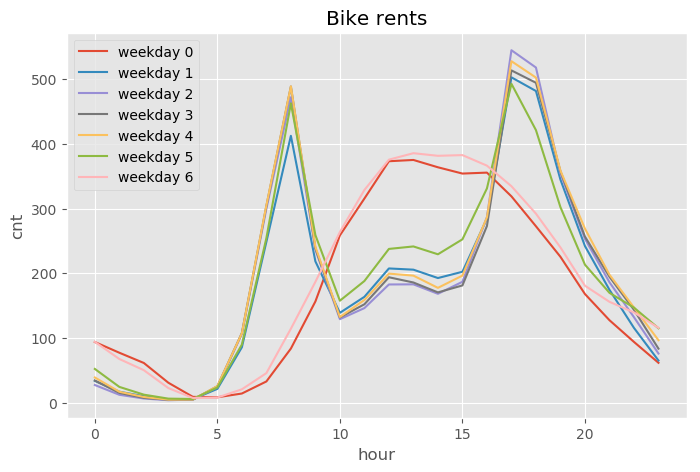

In [71]:
def plot_daily_average(data_array, labels, ylabel, figsize = (8,5)):
    #plt.style.use('ggplot') #'default'
    fig = plt.figure(num=None, figsize=figsize)
    for day in range(data_array.shape[1]):
        plt.plot(data_array[:,day], label = labels[day])
    plt.legend()
    plt.title('Bike rents')
    plt.xlabel('hour')
    plt.ylabel(ylabel)

labels = ["weekday "+str(i) for i in range(7)]

plot_daily_average(data_timed, labels, 'cnt')

### Generealize sorting function a bit

In [246]:
def sort_by_time(selected_feature):
    """ selected_feature must be column name """
    data_timed = np.zeros((24,7))
    for day in range(7):
        idx_day = data_bike_rent['weekday'] == day
        data = data_bike_rent.loc[idx_day, selected_feature].values
        data_hr = data_bike_rent.loc[idx_day, 'hr'].values
        for hour in range(24):
            feature = data[np.where(data_hr == hour)[0]]
            data_timed[hour, day] = np.sum(feature)/feature.shape[0]
    return data_timed

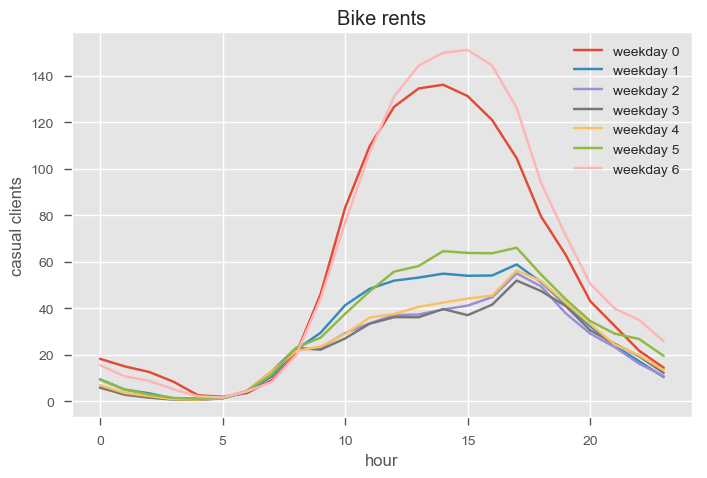

In [248]:
data_casual = sort_by_time('casual')

labels = ["weekday "+str(i) for i in range(7)]
plot_daily_average(data_casual, labels, 'casual clients')

### Explore other correlations - humidity

(array([  23.,   55.,  696., 1481., 2641., 3084., 2940., 2384., 2900.,
        1175.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

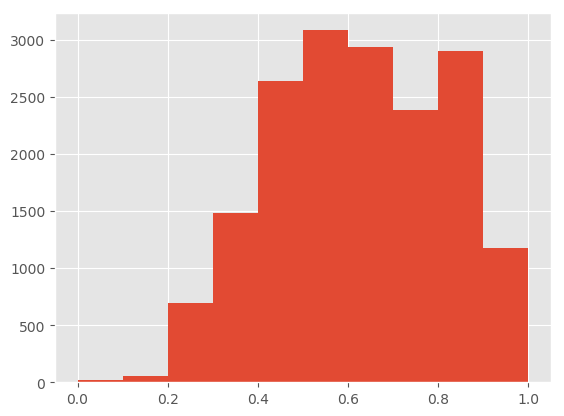

In [61]:
plt.hist(data_bike_rent['hum'], 10)

In [62]:
# Can also be done using numpy (with more options on how to split the data)
#np.histogram(data_bike_rent['hum'])

### Some more slicing - select fractions of specific humidity

In [260]:
IDx = data_bike_rent.index[(data_bike_rent['hum'] <= 1.0) & (data_bike_rent['hum'] > 0.9)].values

(array([763., 203.,  90.,  51.,  26.,  15.,   8.,   5.,   2.,   5.]),
 array([  1.,  74., 147., 220., 293., 366., 439., 512., 585., 658., 731.]),
 <a list of 10 Patch objects>)

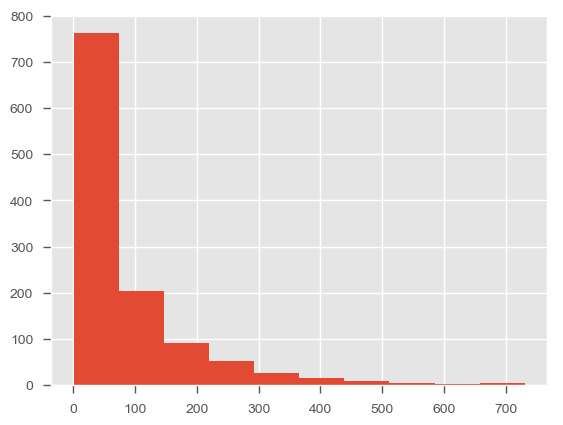

In [261]:
plt.hist(data_bike_rent.loc[IDx, 'cnt'])

In [77]:
# Split data into weekend <-> working day
# and futher into bins of humidity

def sort_by_humidity(selected_feature, selected_days, bins_hum):
    """ Split into selected days and humity bins """
    data_timed = np.zeros((24, len(bins_hum)-1))                         
    data_timed_error = np.zeros((24, len(bins_hum)-1)) 
                          
    for i in range(len(bins_hum)-1):
        data_selection = data_bike_rent[(data_bike_rent['weekday'].isin(selected_days)) & 
                              (data_bike_rent['hum'] <= bins_hum[i+1]) & 
                              (data_bike_rent['hum'] > bins_hum[i])] #[['hr', feature]]   
        data_hr = data_selection['hr'].values
        data_selection = data_selection[selected_feature].values
        for hour in range(24):
            feature = data_selection[np.where(data_hr == hour)[0]]
            data_timed[hour, i] = np.sum(feature)/feature.shape[0]
            data_timed_error[hour, i] = np.std(feature) # use numpy to calculate standard deviation
    return data_timed, data_timed_error

Now that we also get an error (here: standard deviation) with the data, we could update the plotting function

In [92]:
def plot_daily_average2(data_array, 
                        error_array, 
                        labels, 
                        ylabel, 
                        title = 'Bike rents',
                        figsize = (8,5)):
    
    #plt.style.use('ggplot') #'default'
    fig = plt.figure(num=None, figsize=figsize)
    for i in range(data_array.shape[1]):
        y = data_array[:,i]
        plt.plot(y, label = labels[i])
        plt.fill_between(np.arange(24), 
                         y-0.5*error_array[:, i], 
                         y+0.5*error_array[:, i], 
                         alpha = 0.2)
    plt.legend()
    plt.title(title)
    plt.xlabel('hour')
    plt.ylabel(ylabel)

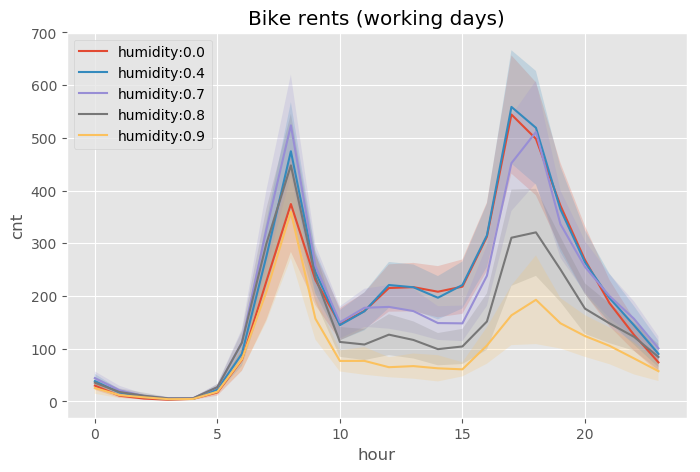

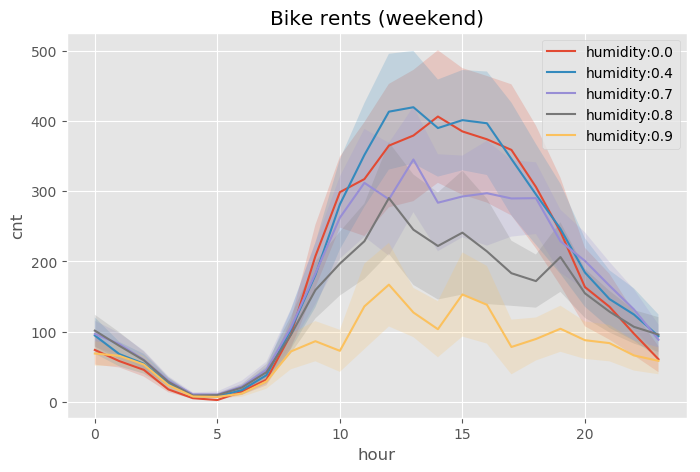

In [93]:
bins_hum = [0., 0.4, 0.7, 0.8, 0.9, 1. ]
labels = ["humidity:" + str(bins) for bins in bins_hum]
selected_feature = 'cnt'
days_week = [1,2,3,4,5]
days_weekend = [0,6]

data_humidity, error = sort_by_humidity(selected_feature, days_week, bins_hum)
plot_daily_average2(data_humidity, error, labels, selected_feature, "Bike rents (working days)")

data_humidity, error = sort_by_humidity(selected_feature, days_weekend, bins_hum)
plot_daily_average2(data_humidity, error, labels, selected_feature, "Bike rents (weekend)")

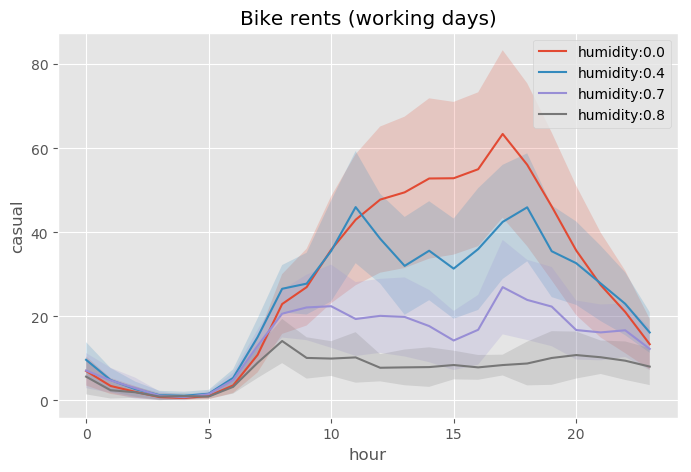

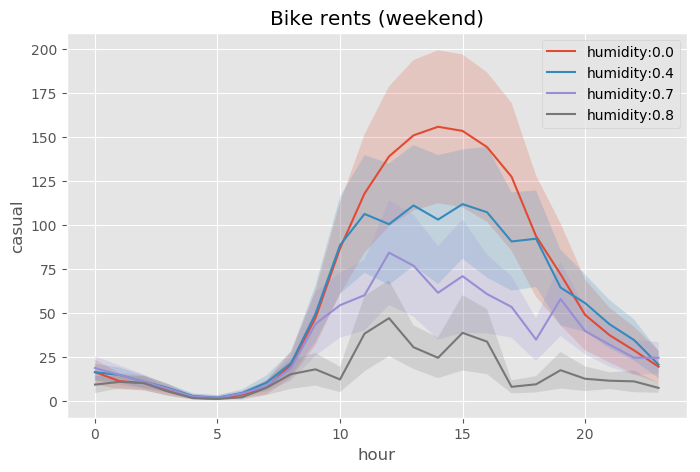

In [94]:
bins_hum = [0., 0.7, 0.8, 0.9, 1. ]
selected_feature = 'casual'
days_week = [1,2,3,4,5]
days_weekend = [0,6]

data_humidity, error = sort_by_humidity(selected_feature, days_week, bins_hum)
plot_daily_average2(data_humidity, error, labels, selected_feature, "Bike rents (working days)")

data_humidity, error = sort_by_humidity(selected_feature, days_weekend, bins_hum)
plot_daily_average2(data_humidity, error, labels, selected_feature, "Bike rents (weekend)")

## Some other exploring options:

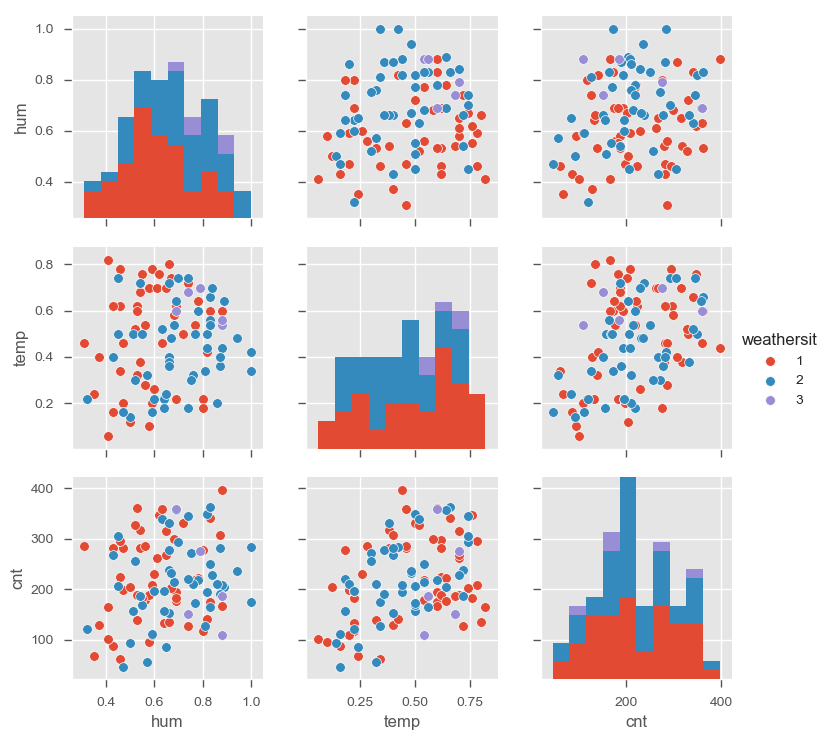

In [311]:
subset = data_bike_rent.loc[(data_bike_rent.hr == 9) & (data_bike_rent.weekday == 1),:]
sns.pairplot(subset, vars=['hum', 'temp', 'cnt'], hue= 'weathersit')

# Some basic machine learning 
Get to know scikit-learn!  
https://scikit-learn.org/stable/  
  
Here, we are going to build a simple model to predict the number of customers from a set of given features (= **regression**). For this we will have to remove obviously redundant features.  
The number of clients 'cnt' of course simply predictable if we give the model the number of casual and the number of registered clients...

### Data preparation 1 - remove redundant (or undesired) features

In [201]:
data_bike_rent.drop(columns =['instant', 'dteday', 'casual', 'registered', 'cnt'])[:5]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


### Data preparation 2 - split categorical features

In [204]:
X_data = data_bike_rent.drop(columns =['instant', 'dteday', 'casual', 'registered', 'cnt'])
X_data['weathersit1'] = 0
X_data['weathersit2'] = 0
X_data['weathersit3'] = 0
X_data['weathersit4'] = 0

X_data.loc[X_data.weathersit == 1, 'weathersit1'] = 1
X_data.loc[X_data.weathersit == 2, 'weathersit2'] = 1
X_data.loc[X_data.weathersit == 3, 'weathersit3'] = 1
X_data.loc[X_data.weathersit == 4, 'weathersit4'] = 1

X_data['seasonWinter'] = 0
X_data['seasonSpring'] = 0
X_data['seasonSummer'] = 0
X_data['seasonAutumn'] = 0

X_data.loc[X_data.season == 1, 'seasonWinter'] = 1
X_data.loc[X_data.season == 2, 'seasonSpring'] = 1
X_data.loc[X_data.season == 3, 'seasonSummer'] = 1
X_data.loc[X_data.season == 4, 'seasonAutumn'] = 1

X_data = X_data.drop(columns =['season', 'weathersit'])

In [205]:
X_data.head()

,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,weathersit1,weathersit2,weathersit3,weathersit4,seasonWinter,seasonSpring,seasonSummer,seasonAutumn
0,0,1,0,0,6,0,0.24,0.2879,0.81,0.0,1,0,0,0,1,0,0,0
1,0,1,1,0,6,0,0.22,0.2727,0.80,0.0,1,0,0,0,1,0,0,0
2,0,1,2,0,6,0,0.22,0.2727,0.80,0.0,1,0,0,0,1,0,0,0
3,0,1,3,0,6,0,0.24,0.2879,0.75,0.0,1,0,0,0,1,0,0,0
4,0,1,4,0,6,0,0.24,0.2879,0.75,0.0,1,0,0,0,1,0,0,0


# 1. Linear regression (scikit-learn)

The same dataset has also been used in https://christophm.github.io/interpretable-ml-book/limo.html

In [97]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Split data into training and test data!
The regression model will only be trained on 80% of the data, the other 20% are kept to evaluate the results.

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X_data, data_bike_rent['cnt'], test_size=0.2, random_state=0)

### Train linear regression model and make predictions on test data

In [263]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [264]:
y_pred = regressor.predict(X_test)

In [265]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df[:10]

,Actual,Predicted
3439,7,83.160242
6542,5,68.412650
15470,743,335.413773
9851,208,117.060563
12640,333,384.785784
1427,187,154.727660
15888,124,170.512158
14772,925,360.490150
15725,212,268.719040
1057,161,150.199178


### Compare linear regression model predictions with actual client numbers

Text(0,0.5,'predicted client number')

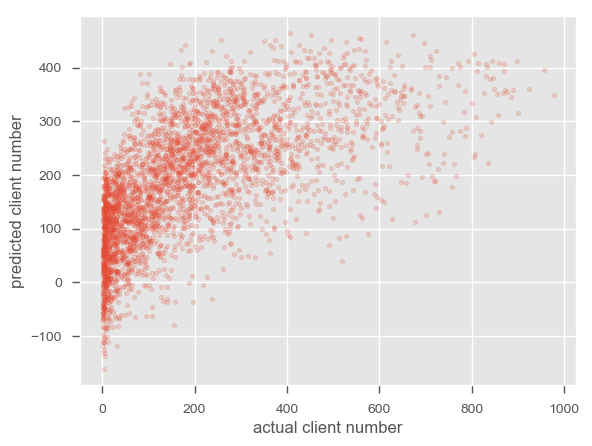

In [276]:
plt.scatter(df.Actual, df.Predicted, alpha = 0.2, s = 10)
plt.xlabel('actual client number')
plt.ylabel('predicted client number')

In [211]:
coeff_df = pd.DataFrame(regressor.coef_, X_data.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
yr,78.351126
mnth,0.349359
hr,7.573540
holiday,-27.220484
weekday,2.051945
workingday,3.325384
temp,242.357124
atemp,123.387384
hum,-183.256667
windspeed,38.644720


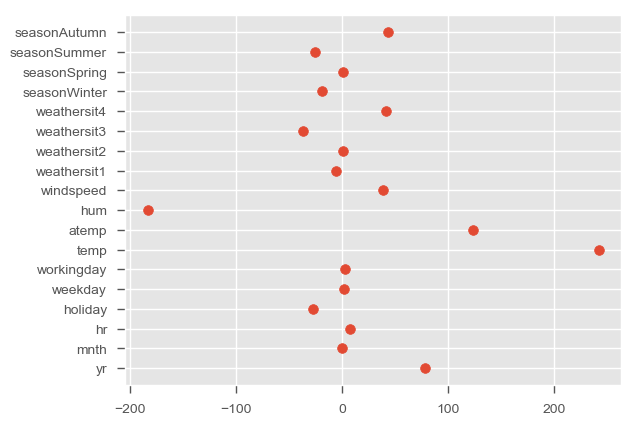

In [275]:
#sns.stripplot(x=regressor.coef_, y=X_data.columns, hue=None, dodge=True, jitter=True, zorder=1)
plt.scatter(x=regressor.coef_, y=X_data.columns)

# 2. Decision tree regressor (scikit-learn)

In [277]:
from sklearn.tree import DecisionTreeRegressor
estimator = DecisionTreeRegressor(random_state=0)

In [278]:
estimator.fit(X_train, y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [279]:
y_pred = estimator.predict(X_test)

Text(0,0.5,'predicted client number')

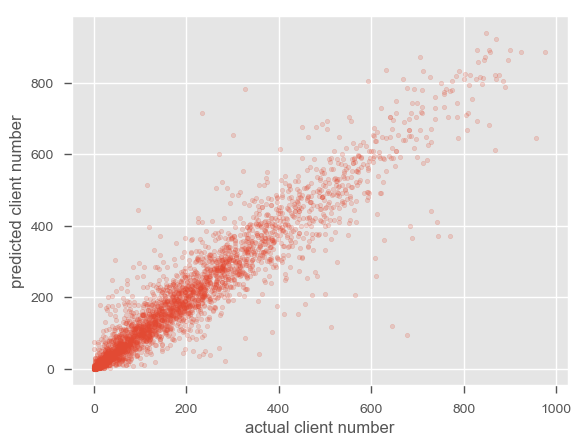

In [280]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.scatter(df.Actual, df.Predicted, alpha = 0.2, s = 10)
plt.xlabel('actual client number')
plt.ylabel('predicted client number')

In [230]:
feature_importance = pd.DataFrame(100*np.round(estimator.feature_importances_,4), X_data.columns, columns=['Feature importance'])  
feature_importance

,Feature importance
yr,7.71
mnth,1.54
hr,61.44
holiday,0.33
weekday,1.28
workingday,5.92
temp,12.19
atemp,1.68
hum,2.58
windspeed,0.86


In [231]:
# import export_graphviz 
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot elsewhere
export_graphviz(regressor, max_depth = 3, out_file ='tree.dot', feature_names =X_data.columns)  

# --> than go to http://www.webgraphviz.com/ and add tree.dot file

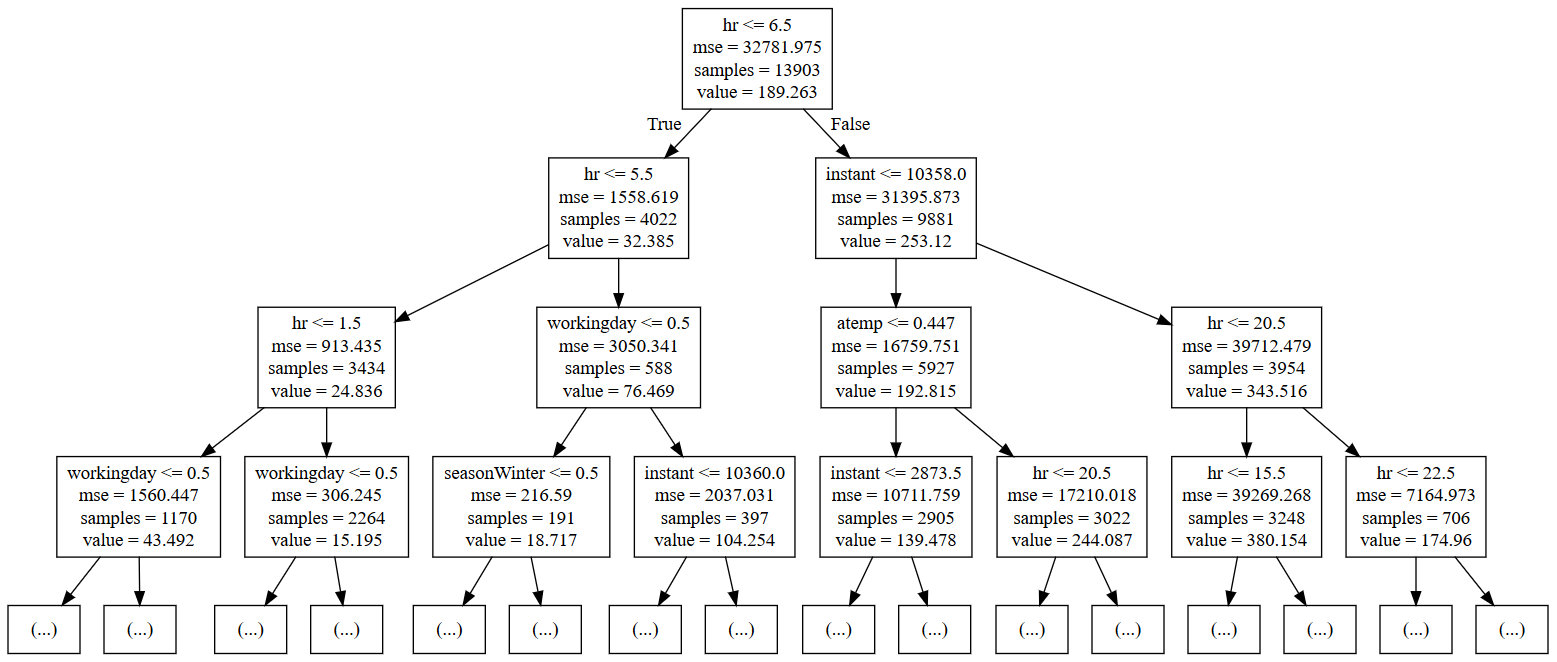

In [197]:
from IPython.display import Image
Image("Screenshot_2019-10-21 Webgraphviz.png")